# Specifications of the Demo-Classifier

Main parameters:
* Takes N standartized inputs (-1 < x < 1)
* Define the number of inputs N using the input_size parameter
* Define the hidden layer size using the hidden_size parameter
* Define the hidden layer count using the hidden_count parameter
* For M outputs, the Classifier will always pick one of them to be 1, and all the other to be 0
* so if you have two possible outputs (cat or dog) specify M=2
* Define the output size M using the output_size parameter

Fine tuning parameters:
* min_PF is the min probability of every cell to fire, even if the network suppresses it (dopout-like effect), default is 0.005
* max_PF is the max probability of every cell to fire, default is 0.995
* The EF resist variable is the cell memory change resistance
* EF starts at init_EF_resist and increases by 1 every turn, until it reaches the max_EF_resist
* D_resist is the memory change resistance for the weights

Cell properties:
* Every cell has a state of:
* PF: the probability of it firing
* F : whether it has fired or not, based on PF
* EF: the moving average of F
* R : last Fire state (1 or 0) multiplyed by the last Reward, or F*Reward
* ER: moving average of R

Weight properties:
* Every weight has a source A and target B cell
* Every weight changes its value W(A,B)
* When network is running, PF(B) = F(A)*W(A,B)
* Upon Reward R, the weight updates itself by W(A,B) += F(A)*F(B)*R
* NOTE: using capital letters for scallars, don't get confused!

Classifier properties:
* Although the demo classifier is using the trivial NN topology and the most basic Local learning method, it is doing as good as standard NNs on tasks needing just a few number of hidden layers
* The demo classifier never overfits
* The demo classifier is a very fast learner

# Imports
Start by importing the network module and the needed libraries:

In [44]:
# - Import the classifier:
from ClassifierDemo import Network

# - Used libraries:
import numpy as np
import random
import time
import utilsDemo
import matplotlib.pyplot as plt
from utilsDemo import println
import pandas as pd

# Trivial Test
* Input will be randomly [1,0] or [0,1]
* Possibles outputs are [1,0] or [0,1]
* Reward will be positive if output = input, else negative
* Lets make sure that classifier learns to react correctly to the input

In [61]:
# Create a classifier object:
input_size   = 2
hidden_size = 6
hidden_count = 1
output_size  = 2
classifier = Network(input_size, hidden_size, output_size, hidden_count)
print(classifier)

NN dims: 2 -> 1x6 -> 2


In [62]:
samples = 100

correctnes_vector = []
sample_numbers = np.arange(samples)

# Repeat for <samples> turns:
for sample in range(samples):
    # - Generate random input [1,0] or [0,1]:
    input_vector = []
    randInt = random.randint(0,1)
    if randInt == 0:
        input_vector.append(1)
        input_vector.append(0)
    else:
        input_vector.append(0)
        input_vector.append(1)
        
    # - Provide the input to the classifier:
    classifier.getInputAndPropagate(input_vector)
    
    # - Get the classifier answer (output: 0 or 1):
    output_place = classifier.returnOutputPlace()
    
    # - Reward the classifier if the answer was 0:
    if output_place == randInt:
        reward = 0.5
    else:
        reward = -0.5
        
    # - DO NOT Reward the classifier:
    classifier.rewardAndUpdate(reward)
    
    # - Add the correct/uncorrect answer to the correctnes_vector:
    if reward == 0.5:
        correctnes_vector.append(1)
    else:
        correctnes_vector.append(0)

print("Correcnt/uncorrect answers list:")
print(correctnes_vector)

Correcnt/uncorrect answers list:
[0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Good, we start with a few uncorrect answers, but then the classifier very qiuckly learns how to avoid them.

As time progresses, the classifier still has a progressivly smaller chance to pick the wrong answer again, very adequately dealing with the exploration-exploitation dilemma.


# Basic classifier test
* Input is a point with coordinates x1 and x2 and class y(x1,x2), where y is one of 3 possible classes

Let's create the dataset and plot it:

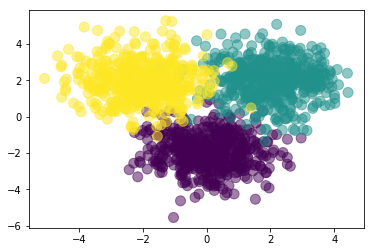

In [64]:
# - Create:
D = 2 # dimensionality of the input
Nclass = 500
X1 = np.random.randn(Nclass, D) + np.array([0 ,-2]) #center on x=0, y=-2
X2 = np.random.randn(Nclass, D) + np.array([2 , 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X  = np.vstack([X1,X2,X3])
y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

# - Plot:
plt.scatter(X[:,0], X[:,1], c=y, s=100, alpha=0.5)
plt.show()

Lets prepare and split the data into training and test sets:


In [75]:
# - Feature Scaling:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# - Splitting the dataset into the Training set and Test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Create a classifier object:

In [88]:
input_size   = 2
hidden_size = 6
hidden_count = 1
output_size  = 3
classifier = Network(input_size, hidden_size, output_size, hidden_count)
print(classifier)

NN dims: 2 -> 1x6 -> 3


Train the classifier on the train set:
* The demo classifier is a very fast learner, and will reach its maximun predictive power after only one epoch. So we will only do one epoch of learning.

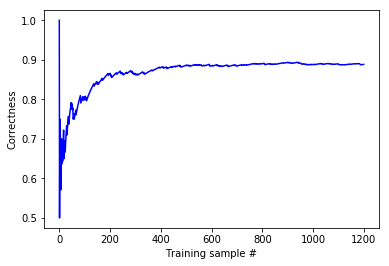

Correct in 88.83333333333333 %


In [96]:
correctnes_vector = []
mean_correctness = []
sample_numbers = np.arange(len(X_train))

for sample in range(len(X_train)):
    # - input_vector = coordinates:
    input_vector = X_train[sample]

    # - Input the classifier:
    classifier.getInputAndPropagate(input_vector)

    # - Get the classifier's prediction:
    output_place = classifier.returnOutputPlace()

    # - Compare the prediction to the real answer (y_train):
    if output_place == y_train[sample]:
        reward = 0.5
        correctnes_vector.append(1)
    else:
        reward = -0.5
        correctnes_vector.append(0)

    # - Feed the reward to the classifier:
    classifier.rewardAndUpdate(reward)
    
    # - Save the correctness in a list to plot later:
    mean_correctness.append(np.mean(correctnes_vector))

# - Learning is done, lets print the correctness against time:
plt.xlabel('Training sample #')
plt.ylabel('Correctness')
plt.plot(sample_numbers, mean_correctness, color="blue")
plt.show()

print("Correct in", np.mean(correctnes_vector)*100, "%")

The classifier learns very rapidly from the data 
and doesn't start to overfit, but settles at some
stable value
* Overfitting is never a possibility for this classifier, as a consequence of the undeterministic structure of the Local rules.
* This structure is closely monitored and preserved with the more advanced models, as this property of the classifiers is the most important for me - they need to extract patterns, not memorise data

Lets see how it does on the test set:
* NOTE: try to rerun the below code a few times, see how the correctness varies a bit. This is due to that inherent undeterminism of the system.

In [100]:
correctnes_vector = []
sample_numbers = np.arange(len(X_train))

for sample in range(len(X_test)):
    # - input_vector = coordinates:
    input_vector = X_test[sample]

    # - Input the classifier:
    classifier.getInputAndPropagate(input_vector)

    # - Get the classifier's prediction:
    output_place = classifier.returnOutputPlace()

    # - Compare the prediction to the real answer (y_train):
    if output_place == y_test[sample]:
        correctnes_vector.append(1)
    else:
        correctnes_vector.append(0)

print("Correct in", np.mean(correctnes_vector)*100, "%")

Correct in 88.0 %


# The Permutation test
This is still a demo, not the solution, so lets see where the demo ends:
* This network does fine with most tests, but lets induce its confusion point
* The simplest possible test that can do that is this one
* Here the network as a whole will need a mechanism that will keep it in sync, like the Global learning algorithms

The test:
* Make 2 dimentional input space where each input value may be 0 or 1
* Answer = 0 if input = [0,1]
* Answer = 1 if input = [1,0]
* Answer = 2 if input = [1,1]
* Possible input = [0,0] is excluded

NN dims: 2 -> 1x6 -> 3


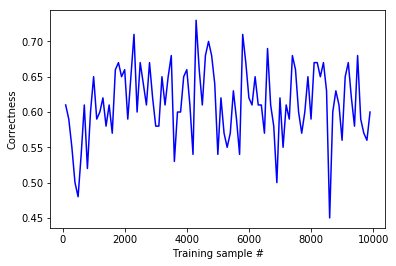

End correctness: 60.0 %


In [144]:
# - Initiate the classifier:
input_size   = 2
hidden_size = 6
hidden_count = 1
output_size  = 3
classifier = Network(input_size, hidden_size, output_size, hidden_count)
print(classifier)

# Test it:
samples = 10000
correctnes_vector = []
mean_correctness  = []
sample_numbers = []

# Repeat for <samples> turns:
for sample in range(samples):
    # - Generate random input [1,0] or [0,1]:
    input_vector = []
    randInt = random.randint(0,2)
    if randInt == 0:
        input_vector = [0,1]
    elif randInt == 1:
        input_vector = [1,0]
    else:
        input_vector = [1,1]
        
    # - Provide the input to the classifier:
    classifier.getInputAndPropagate(input_vector)
    
    # - Get the classifier answer (output: 0 or 1):
    output_place = classifier.returnOutputPlace()
    
    # - Reward the classifier if the answer was 0:
    if output_place == randInt:
        reward = 0.5
        correctnes_vector.append(1)
    else:
        reward = -0.5
        correctnes_vector.append(0)
        
    # - Keep only the last 100 entries:
    if len(correctnes_vector) > 100:
        correctnes_vector.pop(0)
        
    # - DO NOT Reward the classifier:
    classifier.rewardAndUpdate(reward)
    
    # - Add the mean correctness to the list for plotting:
    if sample%100 == 0 and sample != 0:
        mean_correctness.append(np.mean(correctnes_vector))
        sample_numbers.append(sample)

# - Plotting the learning curve:
plt.xlabel('Training sample #')
plt.ylabel('Correctness')
plt.plot(sample_numbers, mean_correctness, color="blue")
plt.show()
        
print("End correctness:", mean_correctness[-1]*100, "%")

The problem:
* You can try different configurations, but at the end, the classifier will always give ~60% correct answers after learning
* The networks can guess without problem the two simple cases [0,1] and [1,0], but struggles with the [1,1] case, as cooperation better coordination cells is needed
* Can this be done, without and extenal agent keeping track of all the network to force coordination upon it? Yes

The solution:
* Given the reward system, the cells and weight "want" to get better, they just need the correct enviornment to get better in
* One way is to find the correct topology, where they can start cooperating
* Another way is to improve the Local learning algorithm, from trying to maximise the self-goal at all costs, to "lets suffer if needed, but make sure we don't do hard to our peer that can really do it"


Please feel free to play with the code. In part 2 we will apply the demo classifier to some real-life examplex to get a better feel for it.